## SEIRS Model - Fixed Iterative Sequential Data-Consistent Parameter Estimation 

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from pydci.examples import seirs
from pydci.log import enable_log, disable_log
from pydci.utils import get_l2_errs, set_seed
from pydci.log import logger
from pydci.utils import get_search_combinations
import pydci.consistent_bayes.OnlineSequential as os
import importlib
importlib.reload(seirs)


SEIRS_PARAM_MINS = 4 * [0]
SEIRS_STATE_MINS = 1e-10
SEIRS_STATE_MAXS = 1

# For periodic behavior
R_0 = 3

# Sample every week
SEIRS_SAMPLE_TS = 1

# Populations are all from 0-1 -> Fraction of population
SEIRS_NOISE = 0.001

# Parameters from bjornstad2020seirs paper
SEIRS_P1 = [
    R_0 / 14.0,  # beta transmission rate - R_0 / gamma -> R_0 > 0 for periodic behavior
    1.0
    / 7.0,  # sigma incubation rate i.e. rate at which exposed hosts become infected - 1 week
    1.0 / 14.0,  # gamma  mean recovery rate - 2 weeks
    1.0 / 365.0,  # xi - loss off imunity rate - 1 year
]

# (1) Policy Lockdown 1 month in: => Slower Transmission Rate(beta) - Time 75
SEIRS_P2 = [
    0.5 * R_0 / 14.0,  # transmission rate halved
    1.0 / 7.0,  # sigm
    1.0 / 14.0,
    1.0 / 365.0,
]
# (2) Virus Mutation 1 year in: => Faster Incubation Rate (sigma) - Time 150
SEIRS_P3 = [
    1.2 * R_0 / 14.0,  # transmission rate increased -> Faster transmitting virus
    1.0 / 3.5,  # Incubation rate halved -> Exposed hosts become infected quicker
    1.0 / 14.0,
    1.0 / 365.0,
]

SEIRS_X0 = [
    0.98,  # susceptible
    0.010,  # exposed
    0.010,  # infected
    0,  # recovered
]

# enable_log(level='DEBUG')
n_samples = 1000
total_time = 1 * 365.25
param_shifts = {0: SEIRS_P1, 25: SEIRS_P2, 150: SEIRS_P3}

## Problem Set-Up

<AxesSubplot: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

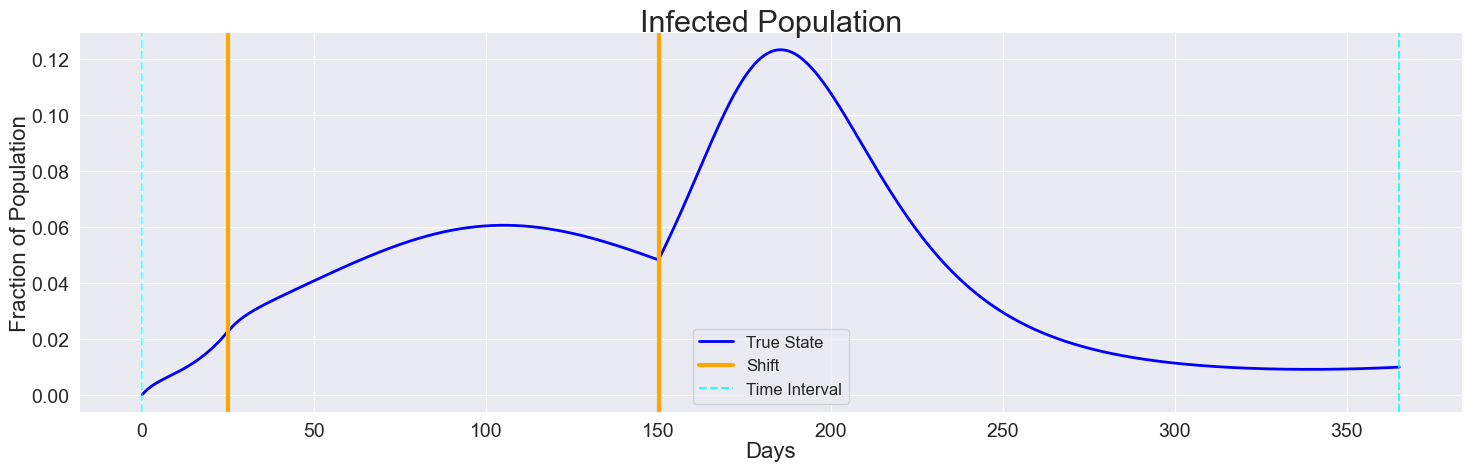

In [2]:
full_sr = seirs.SEIRSModel(
    lam_true=SEIRS_P1,
    param_shifts=param_shifts,
    measurement_noise=SEIRS_NOISE,
    sample_ts=SEIRS_SAMPLE_TS,
    state_mins=SEIRS_STATE_MINS,
    state_maxs=SEIRS_STATE_MAXS,
)
# pi_in, samples = full_sr.get_uniform_initial_samples(num_samples=1, scale=0.1)
res = full_sr.get_data(t0=0, tf=total_time)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
full_sr.plot_infected(plot_samples=False, plot_measurements=False, ax=ax)

# Iterations - Fixed weekly chunks of data

- If problem has not been initialized (no self.probs[] array), then the problem
is initialized with a uniform distribution over the parameter space around the
true value, with a scale of `diff` controlling the size of the uniform distribution
around the true value we search for, and hence the problem difficulty.
- Solve inverse problem for `num_its` consuming `time_step` data at each iteration.
- At each iteration, a set of possible sovle parameters will be searched for, varying:
    - number of PCA components, 
    - data points.
    - number of splits to use on data splits.
- The best solution will be determined by the `best_method` argument.

In [19]:
# disable_log()
enable_log(level="INFO", file="test.log")
set_seed(2023)
sr = seirs.SEIRSModel(
    lam_true=SEIRS_P1,
    param_shifts=param_shifts,
    measurement_noise=SEIRS_NOISE,
    sample_ts=SEIRS_SAMPLE_TS,
    state_mins=SEIRS_STATE_MINS,
    state_maxs=SEIRS_STATE_MAXS,
)

In [20]:
from pydci.log import logger
from pydci.utils import get_search_combinations
import pydci.consistent_bayes.OnlineSequential as os
import importlib

importlib.reload(os)
prob = os.OnlineSequential(
    sr,
    time_step=7,
)
disable_log()
# enable_log(level='DEBUG', filter='pydci.consistent_bayes.OnlineSequential')

<loguru.logger handlers=[(id=3, level=20, sink='test.log')]>

## First Iteration
Note how reset_samples = True 

In [5]:
prob.solve(
    num_its=1,
    max_t=None,
    num_samples=1000,
    max_sample_size=1000,
    samples_inc=None,
    time_step=7,
    exp_thresh=0.2,
    kl_thresh=3.0,
    min_eff_sample_size=1.0,
    num_tries_per_it=2,
    sampling_args={
        "dist": "uniform",
        "scale": 1.0,
    },
    solver_args=dict(
        pca_range=[1, 2],
        split_range=[1, 2],
        all_data=True,
    ),
    make_plots=False,
    seed=2023,
    reset_model=False,
    reset_samples=True,
)

<AxesSubplot: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

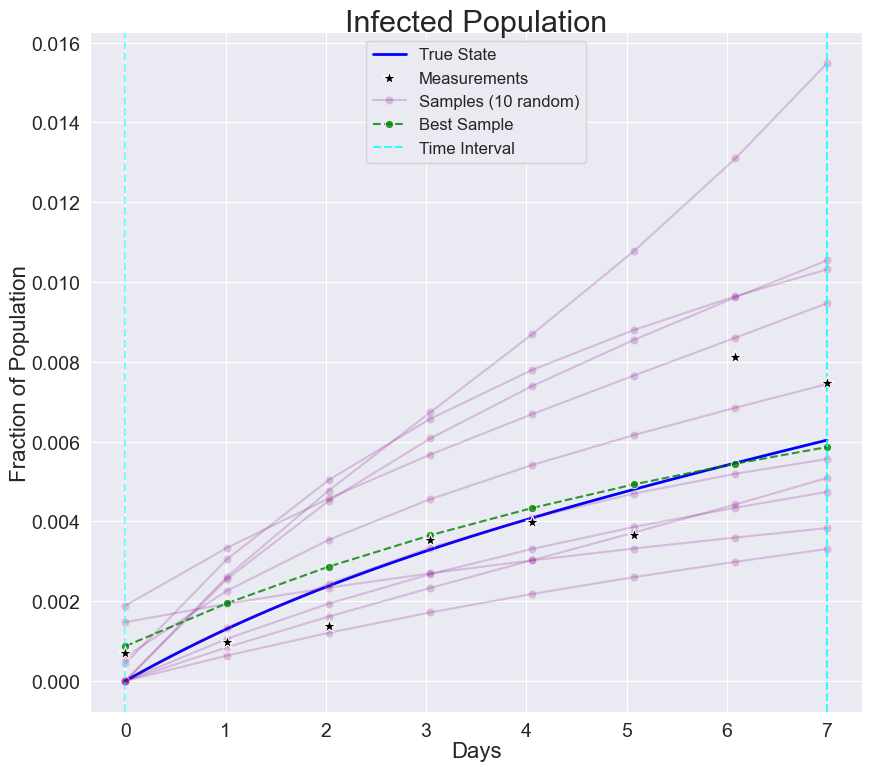

In [6]:
sr.plot_infected()

## Second Iteration

In [7]:
prob.solve(
    num_its=1,
    max_t=None,
    num_samples=1000,
    max_sample_size=1000,
    samples_inc=None,
    time_step=7,
    exp_thresh=0.2,
    kl_thresh=3.0,
    min_eff_sample_size=1.0,
    num_tries_per_it=2,
    sampling_args={
        "dist": "uniform",
        "scale": 1.0,
    },
    solver_args=dict(
        pca_range=[1, 2],
        split_range=[1, 2],
        all_data=True,
    ),
    make_plots=False,
    seed=2023,
    reset_model=False,
    reset_samples=False,
)

<AxesSubplot: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

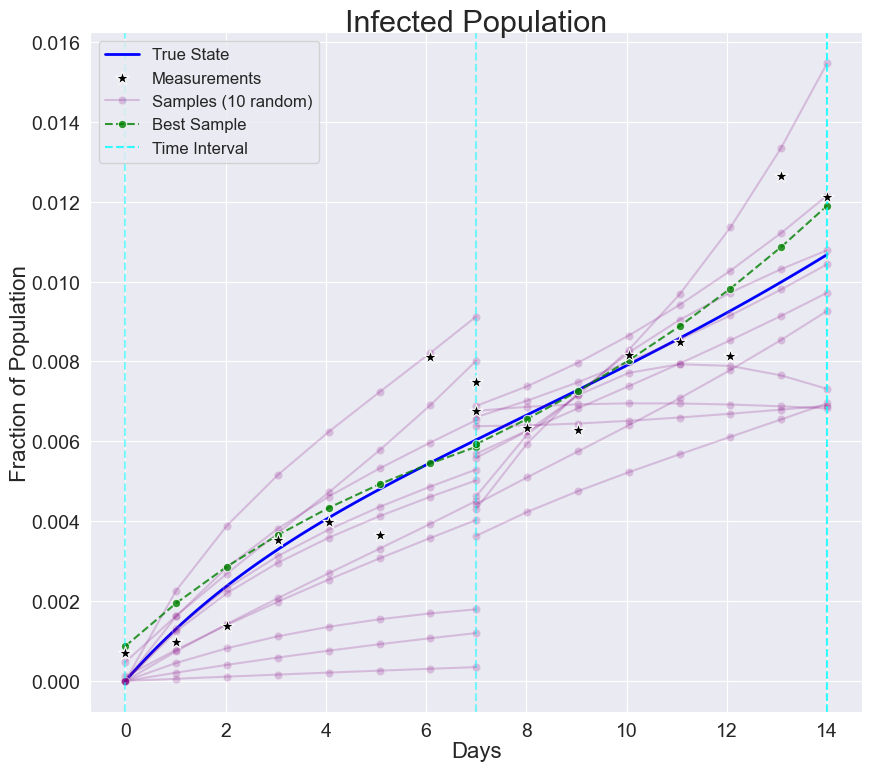

In [8]:
sr.plot_infected()

## Third Iteration

In [9]:
prob.solve(
    num_its=1,
    max_t=None,
    num_samples=1000,
    max_sample_size=1000,
    samples_inc=None,
    time_step=7,
    exp_thresh=0.2,
    kl_thresh=3.0,
    min_eff_sample_size=1.0,
    num_tries_per_it=2,
    sampling_args={
        "dist": "uniform",
        "scale": 1.0,
    },
    solver_args=dict(
        pca_range=[1, 2],
        split_range=[1, 2],
        all_data=True,
    ),
    make_plots=False,
    seed=2023,
    reset_model=False,
    reset_samples=False,
)

Solving model sample set: |█▋                  | ▁▃▅ 84/1000 [8%] in 0s (~0s, 95

<AxesSubplot: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

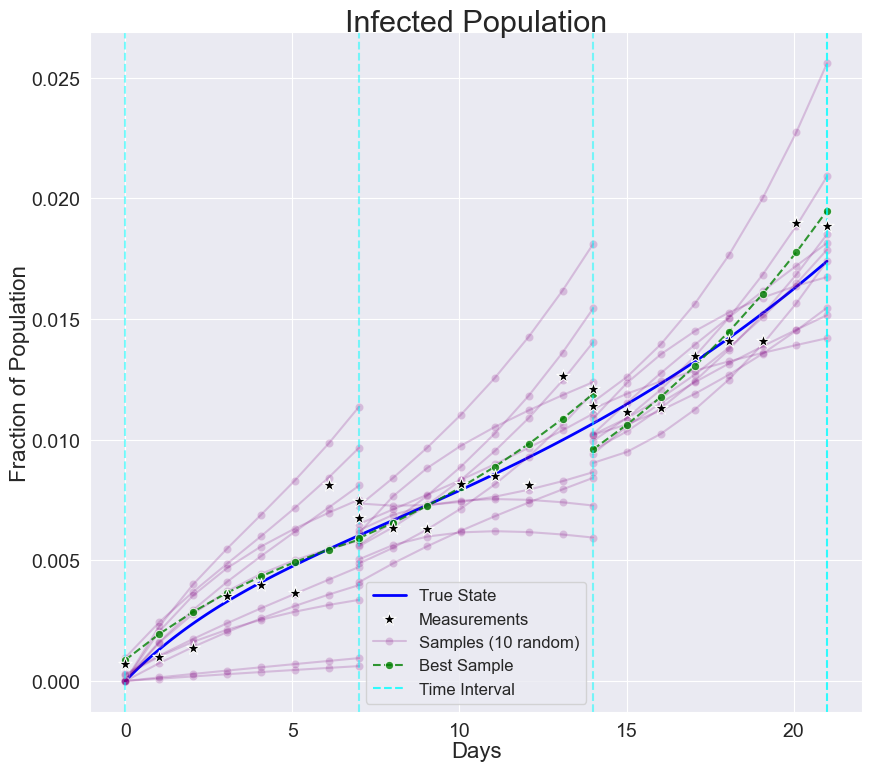

In [10]:
sr.plot_infected()

## Fourth Iteration

In [11]:
prob.solve(
    num_its=1,
    max_t=None,
    num_samples=1000,
    max_sample_size=1000,
    samples_inc=None,
    time_step=7,
    exp_thresh=0.2,
    kl_thresh=3.0,
    min_eff_sample_size=1.0,
    num_tries_per_it=2,
    sampling_args={
        "dist": "uniform",
        "scale": 1.0,
    },
    solver_args=dict(
        pca_range=[1, 2],
        split_range=[1, 2],
        all_data=True,
    ),
    make_plots=False,
    seed=2023,
    reset_model=False,
    reset_samples=False,
)

<AxesSubplot: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

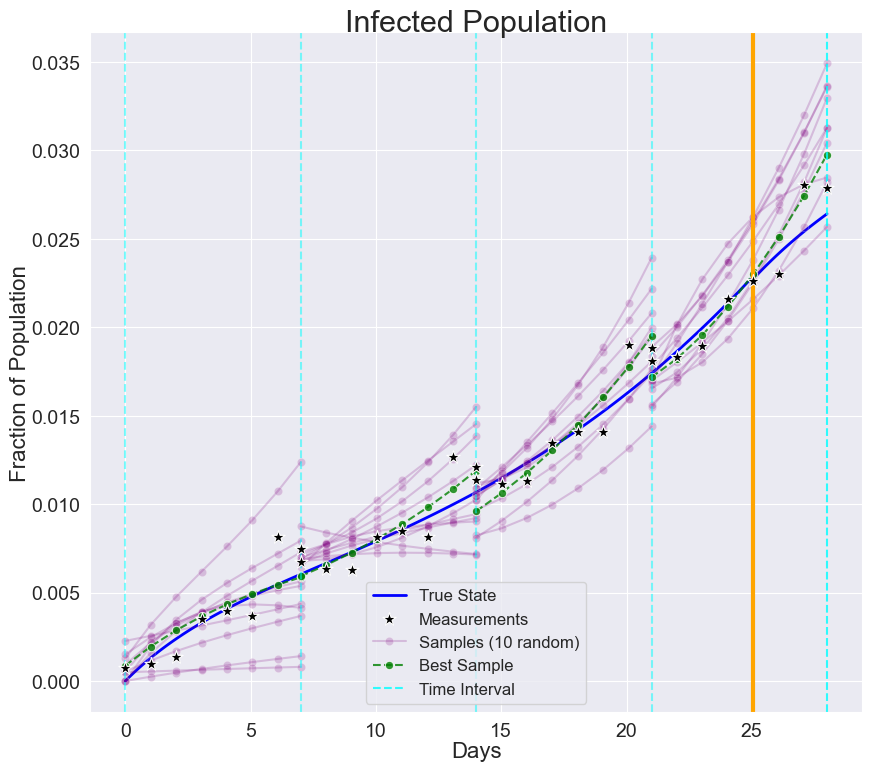

In [12]:
sr.plot_infected()

## Fifth Iteration

In [13]:
prob.solve(
    num_its=1,
    max_t=None,
    num_samples=1000,
    max_sample_size=1000,
    samples_inc=None,
    time_step=7,
    exp_thresh=0.2,
    kl_thresh=3.0,
    min_eff_sample_size=1.0,
    num_tries_per_it=2,
    sampling_args={
        "dist": "uniform",
        "scale": 1.0,
    },
    solver_args=dict(
        pca_range=[1, 2],
        split_range=[1, 2],
        all_data=True,
    ),
    make_plots=False,
    seed=2023,
    reset_model=False,
    reset_samples=False,
)

<AxesSubplot: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

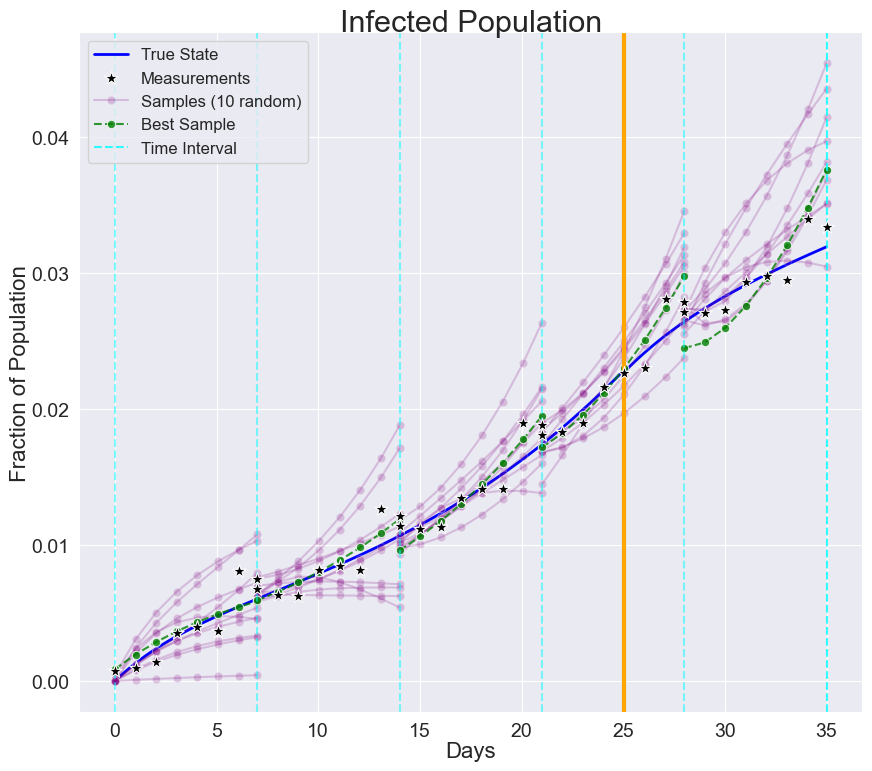

In [14]:
sr.plot_infected()

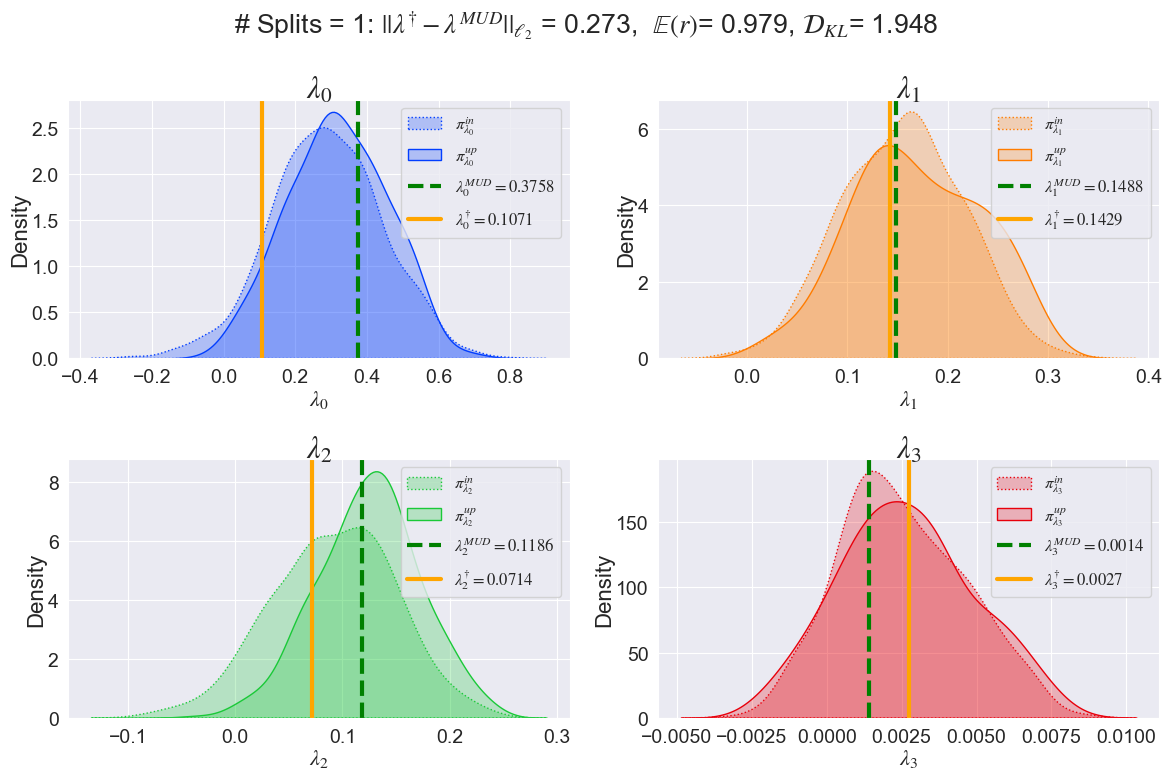

In [15]:
prob.probs[-1].best.param_density_plots(lam_true=np.array(SEIRS_P2))

# Full Simulation

In [21]:
importlib.reload(os)
prob2 = os.OnlineSequential(
    sr,
    time_step=7,
)
# disable_log()
# enable_log(level='DEBUG', filter='pydci.consistent_bayes.OnlineSequential')

<loguru.logger handlers=[(id=4, level=10, sink=<RichHandler (NOTSET)>)]>

In [22]:
Pprob2.solve(
    num_its=52,
    max_t=None,
    num_samples=1000,
    max_sample_size=1000,
    samples_inc=None,
    time_step=7,
    exp_thresh=0.2,
    kl_thresh=3.0,
    min_eff_sample_size=1.0,
    num_tries_per_it=2,
    sampling_args={
        "dist": "uniform",
        "scale": 1.0,
    },
    solver_args=dict(
        pca_range=[1, 2],
        split_range=[1, 2],
        all_data=True,
    ),
    make_plots=False,
    seed=2023,
    reset_model=True,
    reset_samples=True,
)

[08/11/23 14:15:37] INFO     Setting seed to 2023                                           ]8;id=859320;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=711513;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#738\738]8;;\

                    INFO     No previous data -> Starting from initial                      ]8;id=414656;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=775000;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#748\748]8;;\

                    DEBUG    make_plots: False                                              ]8;id=677343;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=122813;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#786\786]8;;\

                    INFO     Starting online solve with 1000 samples                        ]8;id=73820;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=300805;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#790\790]8;;\

                    DEBUG    Getting measurements over time window 0 to 7                   ]8;id=977696;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=394704;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 0                                ]8;id=941971;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=846778;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=55259;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=282060;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Starting from initial Reset:False, Data_Idx: 0                 ]8;id=122812;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=688718;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#628\628]8;;\
                             Sampling Args: {'dist': 'uniform', 'scale': 1.0}                                      
                             Solver Args: {'pca_range': [1, 2], 'split_range': [1, 2],                             
                             'all_data': True}                                                                     

                    INFO     Advancing forward model for 1000 samples                       ]8;id=808750;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=767964;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=709757;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=456845;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True}                                              

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=925248;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=4585;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.010555  1.114436   0.098954   0.104233   0.060070                                
                             0.003183      635                                                                     
                             0  1.010992  0.456600   0.124912   0.080174   0.019144                                
                             0.001627      989                                                                     
                             0  0.677150  1.268668   0.404765   0.117190   0.001806                                
                             0.000703      661                                                                     
                             0  0.745505  0.687880   0.285472   0.008056   0.097750                                
                             0.003201       52                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.010555                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.010992                                                                              
                             0         [0, 1]  range(0, 8)         NaN             2                               
                             0.322850                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.254495                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                                

                    DEBUG    Getting measurements over time window 7 to 14                  ]8;id=131254;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=24741;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 1                                ]8;id=703498;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=873593;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=642866;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=399822;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.788                                  ]8;id=573547;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=358123;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.788 < 1.0).                              ]8;id=87065;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=562095;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_0                                       ]8;id=460871;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=851633;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=290547;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=323327;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=797295;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=954967;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

[08/11/23 14:15:38] INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=1017;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=403386;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.011605  1.033347   0.259206   0.157563   0.093635                                
                             0.003442      507                                                                     
                             0  1.021379  0.273595   0.259206   0.157563   0.093635                                
                             0.003442      507                                                                     
                             0  1.031870  1.125249   0.259206   0.157563   0.093635                                
                             0.003442      507                                                                     
                             0  0.835362  0.591666   0.247195   0.194523   0.025759                                
                             0.003368      729                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.011605                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.021379                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.031870                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.164638                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                                

                    DEBUG    Getting measurements over time window 14 to 21                 ]8;id=151;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=318885;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 2                                ]8;id=397772;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=471964;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=993134;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=207631;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.861                                  ]8;id=877532;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=437292;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.861 < 1.0).                              ]8;id=84353;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=708608;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_1                                       ]8;id=77913;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=75159;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=957783;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=622062;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=853276;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=894379;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=838248;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=193182;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.043351  0.969978   0.167360   0.167975   0.078578                                
                             0.002280      920                                                                     
                             0  1.020039  0.250319   0.131765   0.195410   0.091700                                
                             0.002276      124                                                                     
                             0  1.020397  1.335728   0.208504   0.172018   0.090425                                
                             0.003391      677                                                                     
                             0  0.958764  0.336512   0.080180   0.183539   0.048291                                
                             0.001218      823                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.043351                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.020039                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.020397                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.041236                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 21 to 28                 ]8;id=985690;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=104498;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 3                                ]8;id=657795;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=919194;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=161495;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=885222;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.837                                  ]8;id=499927;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=872469;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.837 < 1.0).                              ]8;id=305574;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=259678;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_2                                       ]8;id=622572;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=545327;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=777569;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=699290;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=545469;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=586453;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=513287;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=354837;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.018934  0.863953   0.362036   0.145998   0.119143                                
                             0.002545      354                                                                     
                             0  1.022981  0.360608   0.262739   0.152636   0.094882                                
                             0.003307      172                                                                     
                             0  1.044414  1.243716   0.362036   0.145998   0.119143                                
                             0.002545      354                                                                     
                             0  0.979441  0.448337   0.228887   0.178771   0.083245                                
                             0.003133      954                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.018934                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.022981                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.044414                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.020559                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 28 to 35                 ]8;id=147521;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=586196;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 4                                ]8;id=242812;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=751528;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=747386;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=574358;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.867                                  ]8;id=173873;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=575858;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.867 < 1.0).                              ]8;id=888050;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=137396;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_3                                       ]8;id=25095;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=684647;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=236364;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=183884;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=513128;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=903529;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=186201;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=163504;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  0.903369  1.954828   0.219865   0.198505   0.110345                                
                             0.003567      352                                                                     
                             0  1.026932  0.498349   0.307650   0.134666   0.097020                                
                             0.002997      248                                                                     
                             0  0.880371  3.186032   0.139598   0.202764   0.092989                                
                             0.004045      226                                                                     
                             0  1.003047  0.573096   0.307650   0.134666   0.097020                                
                             0.002997      248                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.096631                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.026932                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.119629                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.003047                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True     True   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 35 to 42                 ]8;id=471089;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=967414;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 5                                ]8;id=176331;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=588718;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=650258;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=639501;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.503                                  ]8;id=585241;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=768627;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.503 < 1.0).                              ]8;id=291152;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=517197;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_4                                       ]8;id=313835;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=473437;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=282838;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=367196;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

[08/11/23 14:15:39] DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=578126;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=537460;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=254353;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=224336;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.016625  0.967491   0.123281   0.145596   0.067820                                
                             0.003896      414                                                                     
                             0  1.029537  0.416772   0.123281   0.145596   0.067820                                
                             0.003896      414                                                                     
                             0  1.124394  1.184645   0.110865   0.174061   0.080538                                
                             0.002904      197                                                                     
                             0  0.976096  0.610039   0.105980   0.142139   0.057317                                
                             0.003537      371                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.016625                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.029537                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.124394                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.023904                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 42 to 49                 ]8;id=762109;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=579352;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 6                                ]8;id=787831;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=941587;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=553505;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=338563;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.791                                  ]8;id=817934;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=367023;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.791 < 1.0).                              ]8;id=478241;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=689465;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_5                                       ]8;id=366836;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=623756;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=502240;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=874408;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=810899;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=287439;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=226135;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=590898;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.019577  0.984157   0.192944   0.208382   0.130721                                
                             0.003269      571                                                                     
                             0  1.025549  0.388956   0.189472   0.214121   0.135722                                
                             0.003246      612                                                                     
                             0  1.098402  1.245345   0.231876   0.190413   0.136276                                
                             0.004013      885                                                                     
                             0  0.939660  0.661711   0.080724   0.187703   0.075063                                
                             0.004208       23                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.019577                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.025549                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.098402                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.060340                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 49 to 56                 ]8;id=153468;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=412459;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 7                                ]8;id=120522;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=466657;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=158722;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=954401;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.841                                  ]8;id=845004;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=479527;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.841 < 1.0).                              ]8;id=155968;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=569684;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_6                                       ]8;id=265528;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=217200;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=999907;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=398735;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=893437;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=433341;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=425726;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=199214;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.015787  1.237337   0.194036   0.147707   0.091572                                
                             0.005257      851                                                                     
                             0  1.014193  0.541242   0.177293   0.158261   0.094774                                
                             0.005218      608                                                                     
                             0  1.133998  1.520065   0.177709   0.134576   0.084083                                
                             0.005297      449                                                                     
                             0  0.952933  0.782398   0.154780   0.210777   0.104986                                
                             0.000615      223                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.015787                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.014193                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.133998                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.047067                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 56 to 63                 ]8;id=793013;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=106965;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 8                                ]8;id=702529;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=175083;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=903137;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=540468;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.77                                   ]8;id=513105;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=953335;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.77 < 1.0).                               ]8;id=719825;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=480147;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_7                                       ]8;id=307499;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=778672;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=350085;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=298488;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=460331;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=152711;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

[08/11/23 14:15:40] INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=540267;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=656318;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.016165  0.743381   0.225707   0.168513   0.110554                                
                             0.005341      481                                                                     
                             0  1.027867  0.403340   0.199123   0.179822   0.109373                                
                             0.004275      352                                                                     
                             0  1.018511  1.315544   0.153421   0.191248   0.103384                                
                             0.003497      346                                                                     
                             0  0.942021  0.786927   0.227514   0.111208   0.084528                                
                             0.003896       89                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.016165                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.027867                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.018511                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.057979                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 63 to 70                 ]8;id=82126;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=127309;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 9                                ]8;id=189024;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=761371;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=406743;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=869818;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.897                                  ]8;id=138484;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=241076;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.897 < 1.0).                              ]8;id=371704;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=702270;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_8                                       ]8;id=898359;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=66782;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=811984;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=508333;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=353785;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=790726;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=515874;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=211847;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  0.991948  0.745911   0.176268   0.177517   0.102272                                
                             0.004539      464                                                                     
                             0  1.016665  0.351565   0.176268   0.177517   0.102272                                
                             0.004539      464                                                                     
                             0  0.977092  1.190841   0.191248   0.212463   0.122221                                
                             0.004228      123                                                                     
                             0  0.998042  0.379806   0.282605   0.261639   0.178085                                
                             0.002511      644                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.008052                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.016665                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.022908                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.001958                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True     True   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 70 to 77                 ]8;id=423031;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=45005;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 10                               ]8;id=207859;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=887190;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=599843;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=724745;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.927                                  ]8;id=593920;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=163100;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.927 < 1.0).                              ]8;id=228340;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=159438;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_9                                       ]8;id=92243;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=678214;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=905262;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=258666;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=540527;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=589290;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=140406;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=411530;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.006621  0.758477   0.118111   0.193558   0.088751                                
                             0.002755      835                                                                     
                             0  1.027749  0.338126   0.150376   0.166927   0.090645                                
                             0.003247      997                                                                     
                             0  1.056470  0.903374   0.143897   0.211077   0.106277                                
                             0.002264      733                                                                     
                             0  0.919775  0.618617   0.097370   0.164299   0.069971                                
                             0.002401      257                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.006621                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.027749                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.056470                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.080225                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 77 to 84                 ]8;id=7956;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=659080;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 11                               ]8;id=183770;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=136197;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=723746;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=237932;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.875                                  ]8;id=49971;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=352963;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.875 < 1.0).                              ]8;id=575719;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=114595;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_10                                      ]8;id=995203;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=965439;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=795135;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=758181;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=728583;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=532701;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=4072;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=385887;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.033528  0.904895   0.107794   0.158625   0.072983                                
                             0.003666      298                                                                     
                             0  1.020381  0.382434   0.120907   0.173113   0.083285                                
                             0.002990      159                                                                     
                             0  1.110148  1.097288   0.120907   0.173113   0.083285                                
                             0.002990      159                                                                     
                             0  0.775032  0.731847   0.180653   0.181108   0.108753                                
                             0.005131      984                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.033528                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.020381                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.110148                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.224968                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                                

                    DEBUG    Getting measurements over time window 84 to 91                 ]8;id=673150;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=653601;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 12                               ]8;id=367812;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=4068;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=709492;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=657276;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.876                                  ]8;id=93088;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=459313;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.876 < 1.0).                              ]8;id=524535;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=154286;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_11                                      ]8;id=665315;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=525516;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=578897;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=227341;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

[08/11/23 14:15:41] DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=262144;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=526832;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=106160;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=143386;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.064298  0.520586   0.111489   0.180819   0.085400                                
                             0.004493      571                                                                     
                             0  1.027054  0.275097   0.111489   0.180819   0.085400                                
                             0.004493      571                                                                     
                             0  1.129167  0.679337   0.111489   0.180819   0.085400                                
                             0.004493      571                                                                     
                             0  0.919938  0.434436   0.097568   0.139829   0.062912                                
                             0.005633      366                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.064298                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.027054                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.129167                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.080062                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 91 to 98                 ]8;id=160466;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=198864;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 13                               ]8;id=320613;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=54594;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=969715;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=278642;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.961                                  ]8;id=274779;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=352070;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.961 < 1.0).                              ]8;id=215454;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=416361;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_12                                      ]8;id=892591;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=35361;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=681480;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=228090;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=307565;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=121817;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=340601;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=510068;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.032202  0.763870   0.122672   0.145274   0.075359                                
                             0.004721      979                                                                     
                             0  1.023008  0.273278   0.158755   0.182074   0.100876                                
                             0.003956      655                                                                     
                             0  1.054420  1.025477   0.084954   0.136546   0.060394                                
                             0.005174      243                                                                     
                             0  0.920666  0.549446   0.100608   0.179965   0.077805                                
                             0.000521      691                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.032202                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.023008                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.054420                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.079334                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 98 to 105                ]8;id=982154;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=353321;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 14                               ]8;id=299126;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=620255;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=263801;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=210775;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.95                                   ]8;id=601871;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=190961;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.95 < 1.0).                               ]8;id=776157;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=33328;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_13                                      ]8;id=589853;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=663499;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=906153;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=794367;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=423779;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=209056;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=966208;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=777058;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  0.997096  0.677001   0.135755   0.162508   0.081923                                
                             0.001732      819                                                                     
                             0  1.011470  0.563401   0.145776   0.145681   0.078912                                
                             0.003937      685                                                                     
                             0  0.914508  1.727038   0.137578   0.145436   0.080832                                
                             0.006019      164                                                                     
                             0  0.907193  0.641623   0.137578   0.145436   0.080832                                
                             0.006019      164                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.002904                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.011470                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.085492                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.092807                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 105 to 112               ]8;id=919980;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=732807;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 15                               ]8;id=431331;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=318331;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=638944;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=132115;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.941                                  ]8;id=320943;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=733709;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.941 < 1.0).                              ]8;id=771134;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=251047;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_14                                      ]8;id=647995;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=794443;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=181;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=81804;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=419531;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=452130;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

[08/11/23 14:15:42] INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=228468;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=229788;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.023666  0.602976   0.143547   0.173515   0.090196                                
                             0.002795      436                                                                     
                             0  1.025207  0.229440   0.139330   0.168707   0.086777                                
                             0.002480      292                                                                     
                             0  1.075986  0.697383   0.161860   0.170047   0.091801                                
                             0.003471      454                                                                     
                             0  0.775331  0.978648   0.019223   0.104019   0.032238                                
                             0.003904      511                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.023666                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.025207                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.075986                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.224669                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 112 to 119               ]8;id=878385;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=896838;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 16                               ]8;id=831380;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=476129;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=160080;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=323962;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.929                                  ]8;id=165894;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=311468;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.929 < 1.0).                              ]8;id=99804;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=157339;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_15                                      ]8;id=350765;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=626392;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=623580;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=502423;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=174993;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=766191;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=919413;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=843241;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.027734  0.645537   0.146843   0.149526   0.082289                                
                             0.005767      222                                                                     
                             0  1.010287  0.510557   0.149057   0.198950   0.100720                                
                             0.003165      105                                                                     
                             0  1.058672  1.262500   0.156738   0.159428   0.088627                                
                             0.006543      204                                                                     
                             0  0.967184  0.555374   0.149057   0.198950   0.100720                                
                             0.003165      105                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.027734                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.010287                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.058672                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.032816                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 119 to 126               ]8;id=937443;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=997089;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 17                               ]8;id=388658;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=599157;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=676786;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=587141;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.951                                  ]8;id=517333;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=648243;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.951 < 1.0).                              ]8;id=320816;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=162798;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_16                                      ]8;id=671966;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=940693;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=12184;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=332367;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=558643;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=748564;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=557187;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=824334;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.008443  0.659442   0.136225   0.174451   0.089555                                
                             0.001382      441                                                                     
                             0  1.022690  0.237074   0.127137   0.184424   0.090808                                
                             0.002683      125                                                                     
                             0  1.041137  0.752957   0.136225   0.174451   0.089555                                
                             0.001382      441                                                                     
                             0  0.971399  0.258125   0.088923   0.173155   0.074702                                
                             0.003700      780                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.008443                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.022690                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.041137                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.028601                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 126 to 133               ]8;id=926628;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=539293;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 18                               ]8;id=561066;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=728441;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=891615;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=542840;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.947                                  ]8;id=178984;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=751232;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.947 < 1.0).                              ]8;id=420129;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=339770;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_17                                      ]8;id=627027;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=972650;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=204511;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=64184;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=642319;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=955555;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=437335;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=633288;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.026228  0.927827   0.144332   0.187135   0.093607                                
                             0.006413      517                                                                     
                             0  1.017003  0.265198   0.145728   0.177310   0.091082                                
                             0.005576      801                                                                     
                             0  0.954971  1.451637   0.135286   0.152846   0.077906                                
                             0.009714      318                                                                     
                             0  0.858029  0.482847   0.093040   0.199063   0.087234                                
                             -0.002999      770                                                                    
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.026228                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.017003                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.045029                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.141971                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 133 to 140               ]8;id=242196;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=12086;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 19                               ]8;id=171856;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=169822;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=200009;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=515772;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.904                                  ]8;id=110021;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=254363;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.904 < 1.0).                              ]8;id=325708;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=8658;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_18                                      ]8;id=720000;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=543732;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=481210;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=384533;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

[08/11/23 14:15:43] DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=802756;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=311439;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=498241;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=605639;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.023664  0.543462   0.110539   0.145568   0.071689                                
                             0.003154       95                                                                     
                             0  1.025687  0.194163   0.126486   0.148616   0.076424                                
                             0.001316      850                                                                     
                             0  1.053972  0.579273   0.126648   0.121652   0.068318                                
                             0.010437      522                                                                     
                             0  0.916661  0.284114   0.193208   0.144791   0.091972                                
                             0.005748      593                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.023664                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.025687                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.053972                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.083339                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 140 to 147               ]8;id=237692;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=585509;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 20                               ]8;id=368020;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=148192;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=545395;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=43141;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.969                                  ]8;id=83443;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=95171;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.969 < 1.0).                              ]8;id=261728;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=94090;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_19                                      ]8;id=333667;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=218003;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=633863;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=275816;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=808723;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=346656;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=153665;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=496351;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.048622  0.468960   0.126496   0.145107   0.073134                                
                             0.012543      923                                                                     
                             0  1.004808  0.536108   0.120803   0.152411   0.075692                                
                             0.009778      251                                                                     
                             0  1.025643  1.743808   0.091176   0.168842   0.077108                                
                             0.000705      304                                                                     
                             0  0.909308  0.668148   0.069679   0.125236   0.055923                                
                             0.005299      406                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.048622                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.004808                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.025643                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.090692                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 147 to 154               ]8;id=7857;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=746841;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 21                               ]8;id=262499;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=130248;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=400470;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=719115;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.926                                  ]8;id=68183;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=9747;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.926 < 1.0).                              ]8;id=731738;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=477931;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_20                                      ]8;id=77778;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=478569;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=740550;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=951999;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=121341;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=894737;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=366731;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=33621;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                         e_r         kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                           
                             lam_MUD_3  \                                                                          
                             0  3.543402e-01  10.557284   0.022547  -0.006825  -0.003732                           
                             0.023043                                                                              
                             0  1.024152e+00   0.187599   0.138255   0.211454   0.103728                           
                             0.008383                                                                              
                             0  3.047191e-16  10.881776   0.022547  -0.006825  -0.003732                           
                             0.023043                                                                              
                             0  3.825712e-01   1.539993  -0.057807   0.107322   0.029734                           
                             0.010220                                                                              
                                                                                                                   
                                MUD_idx pca_components     pca_mask  search_index                                  
                             num_splits  \                                                                         
                             0      363            [0]  range(0, 8)             0                                  
                             NaN                                                                                   
                             0      390            [0]  range(4, 8)             1                                  
                             2.0                                                                                   
                             0      363         [0, 1]  range(0, 8)             2                                  
                             NaN                                                                                   
                             0      961         [0, 1]  range(0, 4)             3                                  
                             NaN                                                                                   
                                                                                                                   
                                predict_delta  within_thresh  closest  max_kl  min_kl                              
                             num_samples  \                                                                        
                             0       0.645660          False    False   False   False                              
                             1000                                                                                  
                             0       0.024152           True     True    True    True                              
                             1000                                                                                  
                             0       1.000000          False    False   False   False                              
                             1000                                                                                  
                             0       0.617429          False    False   False   False                              
                             1000                                                

                    DEBUG    Getting measurements over time window 154 to 161               ]8;id=508233;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=12094;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 22                               ]8;id=741894;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=339521;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=428994;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=281595;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.001                                  ]8;id=207444;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=165432;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.001 < 1.0).                              ]8;id=733121;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=747456;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_21                                      ]8;id=249788;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=419615;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=576706;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=762133;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=197444;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=359878;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

[08/11/23 14:15:44] DEBUG    Failed with 1000 samples:                                      ]8;id=626965;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=568743;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#658\658]8;;\
                                         e_r         kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                           
                             lam_MUD_3  \                                                                          
                             0  1.195909e-16  11.857601  -0.087601  -0.098724  -0.056221                           
                             0.024503                                                                              
                             0  1.736072e-01   9.029132  -0.011735  -0.098655  -0.043733                           
                             0.045544                                                                              
                             0  2.832991e-25  11.421968  -0.087601  -0.098724  -0.056221                           
                             0.024503                                                                              
                             0  2.232828e-02  10.740318  -0.087601  -0.098724  -0.056221                           
                             0.024503                                                                              
                                                                                                                   
                                MUD_idx pca_components     pca_mask  search_index                                  
                             predict_delta  \                                                                      
                             0      722            [0]  range(0, 8)             0                                  
                             1.000000                                                                              
                             0      654            [0]  range(0, 4)             1                                  
                             0.826393                                                                              
                             0      722         [0, 1]  range(0, 8)             2                                  
                             1.000000                                                                              
                             0      722         [0, 1]  range(0, 4)             3                                  
                             0.977672                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl                                             
                             0          False    False   False   False                                             
                             0          False    False   False   False                                             
                             0          False    False   False   False                                             
                             0          False    False   False   False                                             

                    DEBUG    Reached max sample size of 1000                                ]8;id=296357;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=567105;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#680\680]8;;\

                    INFO     Solved FAILED (s = 1000). Results:                             ]8;id=316229;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=278706;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                         e_r         kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                           
                             lam_MUD_3  \                                                                          
                             0  1.195909e-16  11.857601  -0.087601  -0.098724  -0.056221                           
                             0.024503                                                                              
                             0  1.736072e-01   9.029132  -0.011735  -0.098655  -0.043733                           
                             0.045544                                                                              
                             0  2.832991e-25  11.421968  -0.087601  -0.098724  -0.056221                           
                             0.024503                                                                              
                             0  2.232828e-02  10.740318  -0.087601  -0.098724  -0.056221                           
                             0.024503                                                                              
                                                                                                                   
                                MUD_idx pca_components     pca_mask  search_index                                  
                             predict_delta  \                                                                      
                             0      722            [0]  range(0, 8)             0                                  
                             1.000000                                                                              
                             0      654            [0]  range(0, 4)             1                                  
                             0.826393                                                                              
                             0      722         [0, 1]  range(0, 8)             2                                  
                             1.000000                                                                              
                             0      722         [0, 1]  range(0, 4)             3                                  
                             0.977672                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0          False    False   False   False         1000                                
                             False                                                                                 
                             0          False    False   False   False         1000                                
                             False                                                                                 
                             0          False    False   False   False         1000                                
                             False                                                                                 
                             0          False    False   False   False         1000                                
                             False                                              

                    INFO     Avg KL value of True > 3.0 -> shifting time window             ]8;id=246624;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=430806;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#840\840]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=318633;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=541206;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Starting from initial Reset:True, Data_Idx: 22                 ]8;id=601855;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=167485;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#628\628]8;;\
                             Sampling Args: {'dist': 'uniform', 'scale': 1.0}                                      
                             Solver Args: {'pca_range': [1, 2], 'split_range': [1, 2],                             
                             'all_data': True, 'weights': None, 'search_exp_thresh': 0.2}                          

                    INFO     Advancing forward model for 1000 samples                       ]8;id=665126;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=306716;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=399256;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=848189;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=244949;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=85730;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  0.956822  3.777337   0.372977   0.131141   0.040735                                
                             0.001289      548                                                                     
                             0  0.987109  2.597838   0.384515   0.141453   0.037475                                
                             0.001707      640                                                                     
                             0  1.144538  4.310015   0.043943   0.149545   0.009267                                
                             0.000551      436                                                                     
                             0  0.862315  3.061662   0.370791   0.072200   0.015658                                
                             0.000647      274                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.043178                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.012891                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.144538                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.137685                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                               

                    DEBUG    Getting measurements over time window 161 to 168               ]8;id=115029;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=785673;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 23                               ]8;id=8982;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=10355;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=386900;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=489397;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.113                                  ]8;id=144982;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=69580;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.113 < 1.0).                              ]8;id=69179;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=728808;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_22                                      ]8;id=426492;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=752791;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=101718;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=265873;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=125802;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=54375;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=220669;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=692811;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.039353  1.202090   0.226925   0.213609   0.050916                                
                             0.000973      602                                                                     
                             0  1.011410  0.786047   0.163534   0.252649   0.050115                                
                             0.001454      338                                                                     
                             0  1.045419  1.996507   0.131104   0.230006   0.035706                                
                             0.002940      600                                                                     
                             0  1.017544  0.833283   0.163534   0.252649   0.050115                                
                             0.001454      338                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.039353                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.011410                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.045419                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.017544                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 168 to 175               ]8;id=577430;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=960677;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 24                               ]8;id=117053;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=757735;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=336189;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=710322;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.61                                   ]8;id=197488;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=762076;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.61 < 1.0).                               ]8;id=631766;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=168338;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_23                                      ]8;id=322715;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=672011;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=842948;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=592494;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=701281;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=488977;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=494035;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=682273;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.033583  1.154494   0.229699   0.213431   0.052237                                
                             0.002247      895                                                                     
                             0  1.023301  0.621178   0.226800   0.165327   0.036880                                
                             0.002711      177                                                                     
                             0  1.048173  1.630276   0.229699   0.213431   0.052237                                
                             0.002247      895                                                                     
                             0  1.005074  0.808893   0.287144   0.157568   0.047752                                
                             0.002174      948                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.033583                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.023301                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.048173                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.005074                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True     True   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 175 to 182               ]8;id=813085;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=999389;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 25                               ]8;id=797620;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=550948;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

[08/11/23 14:15:45] DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=614445;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=310674;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.67                                   ]8;id=285714;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=777735;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.67 < 1.0).                               ]8;id=405986;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=497487;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_24                                      ]8;id=45313;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=822916;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=912766;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=990916;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=986436;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=442154;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=721836;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=770070;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  0.979960  1.507380   0.225886   0.229998   0.057359                                
                             0.002163      990                                                                     
                             0  0.999143  1.003687   0.228007   0.219297   0.054075                                
                             0.001268      666                                                                     
                             0  1.002616  1.883030   0.225886   0.229998   0.057359                                
                             0.002163      990                                                                     
                             0  0.957110  0.963034   0.210823   0.187014   0.043007                                
                             0.001381      960                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.020040                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.000857                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.002616                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.042890                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 182 to 189               ]8;id=495966;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=631182;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 26                               ]8;id=618573;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=699952;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=921913;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=683873;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.663                                  ]8;id=412636;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=153505;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.663 < 1.0).                              ]8;id=536252;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=288415;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_25                                      ]8;id=975496;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=528525;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=208375;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=604802;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=927587;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=250139;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=698369;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=961465;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.036850  1.000152   0.227981   0.219121   0.055717                                
                             0.002996      427                                                                     
                             0  1.005874  0.644386   0.245409   0.228363   0.059795                                
                             0.001682      515                                                                     
                             0  1.080555  1.369959   0.245409   0.228363   0.059795                                
                             0.001682      515                                                                     
                             0  0.954422  0.757284   0.255809   0.234903   0.059276                                
                             0.003928      724                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.036850                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.005874                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.080555                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.045578                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 189 to 196               ]8;id=382178;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=208177;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 27                               ]8;id=813609;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=660029;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=913985;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=720294;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.734                                  ]8;id=801691;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=853449;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.734 < 1.0).                              ]8;id=494652;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=578327;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_26                                      ]8;id=734664;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=16171;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=804584;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=287178;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=5743;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=370584;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=662692;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=280762;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.021664  0.901654   0.250224   0.206173   0.055730                                
                             0.000032      887                                                                     
                             0  1.025660  0.232649   0.277301   0.214905   0.060754                                
                             0.001955       86                                                                     
                             0  1.000761  1.671527   0.337142   0.246033   0.074443                                
                             0.003619      866                                                                     
                             0  0.748698  0.648488   0.232541   0.211554   0.053080                                
                             0.000399      577                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.021664                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.025660                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.000761                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.251302                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True     True    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 196 to 203               ]8;id=677176;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=685333;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 28                               ]8;id=378108;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=340649;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=390721;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=846187;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.835                                  ]8;id=55768;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=536258;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.835 < 1.0).                              ]8;id=293892;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=983766;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_27                                      ]8;id=482676;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=674733;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=265847;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=629637;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=719841;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=184447;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

[08/11/23 14:15:46] INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=460266;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=796246;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.019786  0.600710   0.311006   0.257251   0.073277                                
                             0.004455      844                                                                     
                             0  1.019636  0.348036   0.303853   0.249588   0.071139                                
                             0.002972      221                                                                     
                             0  1.051704  0.604102   0.311006   0.257251   0.073277                                
                             0.004455      844                                                                     
                             0  0.829641  0.740542   0.241579   0.288417   0.069539                                
                             0.003363      654                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.019786                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.019636                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.051704                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.170359                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 203 to 210               ]8;id=836854;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=196199;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 29                               ]8;id=138351;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=438715;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=908934;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=237164;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.98                                   ]8;id=22665;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=592045;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.98 < 1.0).                               ]8;id=800104;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=20993;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_28                                      ]8;id=423620;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=312876;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=873592;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=720258;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=167206;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=315444;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=159468;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=302162;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.015657  0.523103   0.292876   0.255843   0.071833                                
                             0.003522      593                                                                     
                             0  1.024428  0.199981   0.293901   0.275474   0.074309                                
                             0.003230      885                                                                     
                             0  1.033513  0.618093   0.307305   0.251540   0.072905                                
                             0.004145      475                                                                     
                             0  0.934244  0.395606   0.148070   0.258146   0.054621                                
                             -0.002075      617                                                                    
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.015657                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.024428                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.033513                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.065756                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 210 to 217               ]8;id=876679;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=141259;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 30                               ]8;id=99991;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=495714;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=212807;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=701052;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.962                                  ]8;id=347662;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=689025;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.962 < 1.0).                              ]8;id=397817;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=655088;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_29                                      ]8;id=766440;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=149451;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=149466;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=819485;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=129782;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=141786;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=592917;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=501505;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.025063  0.444963   0.285339   0.258359   0.070983                                
                             0.000654       61                                                                     
                             0  1.015620  0.346860   0.281226   0.267121   0.070978                                
                             0.001418      236                                                                     
                             0  1.037644  0.535747   0.285339   0.258359   0.070983                                
                             0.000654       61                                                                     
                             0  0.714562  0.781601   0.299399   0.262902   0.071538                                
                             0.000657      419                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.025063                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.015620                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.037644                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.285438                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 217 to 224               ]8;id=202213;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=97025;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 31                               ]8;id=831733;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=377931;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=470908;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=192051;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.995                                  ]8;id=692364;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=902346;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.995 < 1.0).                              ]8;id=641556;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=355984;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_30                                      ]8;id=733649;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=174616;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=630226;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=861239;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=816106;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=339081;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

[08/11/23 14:15:47] INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=909796;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=63389;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.001194  0.912408   0.316061   0.268737   0.076163                                
                             0.001332      274                                                                     
                             0  1.008949  0.427955   0.280491   0.279523   0.073637                                
                             0.001164      428                                                                     
                             0  0.994055  0.915031   0.304903   0.273797   0.074803                                
                             -0.000174      932                                                                    
                             0  0.896524  0.457575   0.323263   0.265178   0.078387                                
                             0.005043      420                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.001194                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.008949                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.005945                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.103476                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                               

                    DEBUG    Getting measurements over time window 224 to 231               ]8;id=247624;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=36410;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 32                               ]8;id=880081;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=814902;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=70571;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=591091;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.936                                  ]8;id=664670;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=722026;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.936 < 1.0).                              ]8;id=732228;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=535556;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_31                                      ]8;id=788304;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=889610;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=778940;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=881969;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=612460;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=909265;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=250808;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=194013;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.033601  0.455929   0.293130   0.282224   0.075298                                
                             0.000879      687                                                                     
                             0  1.019316  0.228814   0.304021   0.269530   0.074421                                
                             0.000390      386                                                                     
                             0  1.033776  0.474266   0.222987   0.291447   0.068857                                
                             -0.000578      756                                                                    
                             0  0.662629  0.496464   0.179721   0.264249   0.058657                                
                             -0.004456      891                                                                    
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.033601                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.019316                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.033776                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.337371                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 231 to 238               ]8;id=902732;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=790413;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 33                               ]8;id=933218;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=113272;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=598318;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=388913;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 1.0                                    ]8;id=739069;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=1831;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 1.0 < 1.0).                                ]8;id=3361;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=539932;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_32                                      ]8;id=733561;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=416327;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=30557;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=609554;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=133326;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=828390;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=54187;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=558040;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.026830  0.423219   0.248030   0.285610   0.070532                                
                             0.000514      161                                                                     
                             0  1.010768  0.331083   0.244146   0.293264   0.071295                                
                             -0.001044      276                                                                    
                             0  1.000443  0.577299   0.229032   0.303548   0.070856                                
                             -0.004854      348                                                                    
                             0  0.825536  0.423162   0.263268   0.305488   0.076887                                
                             0.001334      326                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.026830                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.010768                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.000443                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.174464                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True     True    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                               

                    DEBUG    Getting measurements over time window 238 to 245               ]8;id=63606;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=59468;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 34                               ]8;id=729674;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=651255;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=13887;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=353363;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.986                                  ]8;id=47706;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=715697;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.986 < 1.0).                              ]8;id=383588;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=471149;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_33                                      ]8;id=459973;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=631623;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=653646;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=482727;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=764451;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=191789;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

[08/11/23 14:15:48] INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=752116;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=981155;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.021169  0.446819   0.268968   0.291607   0.073437                                
                             0.000509      351                                                                     
                             0  1.025469  0.161481   0.275340   0.300698   0.075231                                
                             0.001459      906                                                                     
                             0  0.977149  0.511133   0.268968   0.291607   0.073437                                
                             0.000509      351                                                                     
                             0  0.874144  0.230052   0.232389   0.295254   0.070960                                
                             -0.001556      577                                                                    
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.021169                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.025469                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.022851                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.125856                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 245 to 252               ]8;id=869918;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=675434;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 35                               ]8;id=393886;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=238842;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=292996;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=357068;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.986                                  ]8;id=995331;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=468407;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.986 < 1.0).                              ]8;id=926522;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=526610;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_34                                      ]8;id=756949;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=928619;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=897612;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=433016;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=767303;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=370293;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=121623;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=801895;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.018728  0.526771   0.263752   0.300341   0.074209                                
                             0.000983      242                                                                     
                             0  1.014307  0.251074   0.242510   0.290084   0.070698                                
                             -0.002388      415                                                                    
                             0  0.889423  0.669104   0.267210   0.262530   0.071136                                
                             0.002276      162                                                                     
                             0  0.547199  0.537862   0.331441   0.346254   0.089035                                
                             0.004712      251                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.018728                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.014307                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.110577                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.452801                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 252 to 259               ]8;id=353175;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=317040;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 36                               ]8;id=589105;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=122847;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=427266;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=70449;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.993                                  ]8;id=117749;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=69710;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.993 < 1.0).                              ]8;id=392185;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=118280;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_35                                      ]8;id=274383;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=909859;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=319990;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=726237;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=928331;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=144628;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=728438;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=386229;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.018258  0.417431   0.253804   0.243038   0.066830                                
                             0.000011       18                                                                     
                             0  1.021125  0.159717   0.282360   0.243286   0.070142                                
                             0.001792      153                                                                     
                             0  0.908113  0.704761   0.258319   0.274647   0.072896                                
                             0.000827      559                                                                     
                             0  0.657393  0.370731   0.511198   0.221744   0.089031                                
                             0.012966      490                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.018258                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.021125                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.091887                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.342607                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 259 to 266               ]8;id=972739;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=323140;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 37                               ]8;id=86567;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=251644;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=245204;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=373226;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.986                                  ]8;id=193079;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=710804;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.986 < 1.0).                              ]8;id=497546;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=520542;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_36                                      ]8;id=525196;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=459859;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=311491;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=990637;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=418234;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=982729;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

[08/11/23 14:15:49] INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=775512;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=75599;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.030652  0.431407   0.277196   0.248729   0.070087                                
                             0.001003      970                                                                     
                             0  1.023063  0.185721   0.276531   0.242716   0.069298                                
                             0.003997      838                                                                     
                             0  0.779274  0.833700   0.336695   0.261017   0.076865                                
                             0.001483      844                                                                     
                             0  0.471192  0.445737   0.175003   0.262977   0.061973                                
                             0.001203      840                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.030652                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.023063                                                                              
                             0         [0, 1]  range(0, 8)         NaN             2                               
                             0.220726                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.528808                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0          False    False   False   False         1000                                
                             False                                               

                    DEBUG    Getting measurements over time window 266 to 273               ]8;id=599234;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=253105;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 38                               ]8;id=858683;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=220127;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=212539;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=309399;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.999                                  ]8;id=562417;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=633449;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.999 < 1.0).                              ]8;id=157110;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=276769;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_37                                      ]8;id=464326;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=270450;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=840217;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=546232;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=8443;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=101937;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=996927;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=702516;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.027944  0.309464   0.300988   0.231655   0.068825                                
                             -0.000678      362                                                                    
                             0  1.019533  0.182301   0.289109   0.231072   0.066280                                
                             -0.001204      160                                                                    
                             0  0.850596  0.712931   0.349328   0.219518   0.071665                                
                             0.004025      819                                                                     
                             0  0.788930  0.235286   0.147317   0.261481   0.056253                                
                             -0.007417      476                                                                    
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.027944                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.019533                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.149404                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.211070                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 273 to 280               ]8;id=396969;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=6403;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 39                               ]8;id=465985;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=230590;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=216917;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=51133;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 1.0                                    ]8;id=645475;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=596021;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 1.0 < 1.0).                                ]8;id=843813;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=255222;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_38                                      ]8;id=983902;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=352598;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=771118;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=842682;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=851020;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=244149;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=818832;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=367552;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.030335  0.336621   0.245788   0.223159   0.062089                                
                             0.000635       64                                                                     
                             0  1.020571  0.157031   0.249854   0.222891   0.062258                                
                             -0.000834      237                                                                    
                             0  0.984721  0.372716   0.287470   0.229352   0.066847                                
                             -0.002303      249                                                                    
                             0  0.546935  0.363131   0.561758   0.224438   0.091191                                
                             0.008004      938                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.030335                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.020571                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.015279                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.453065                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True     True    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 280 to 287               ]8;id=123339;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=278015;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 40                               ]8;id=283615;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=440768;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=838445;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=629846;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.986                                  ]8;id=246860;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=963908;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.986 < 1.0).                              ]8;id=258132;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=812724;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_39                                      ]8;id=34724;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=49302;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=265666;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=966957;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=518894;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=551268;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=639258;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=50937;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.015361  0.459083   0.228022   0.247341   0.063265                                
                             -0.001840      323                                                                    
                             0  1.015575  0.306799   0.228022   0.247341   0.063265                                
                             -0.001840      323                                                                    
                             0  0.980918  0.456824   0.483678   0.249423   0.090240                                
                             0.009578      290                                                                     
                             0  0.689291  0.553022   0.178257   0.218007   0.051135                                
                             -0.012936      552                                                                    
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.015361                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.015575                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.019082                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.310709                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                               

                    DEBUG    Getting measurements over time window 287 to 294               ]8;id=69319;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=242533;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 41                               ]8;id=755759;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=148038;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=9935;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=562455;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.989                                  ]8;id=548159;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=82709;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.989 < 1.0).                              ]8;id=116672;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=20603;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_40                                      ]8;id=659265;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=253107;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=286901;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=221229;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=766083;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=902969;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

[08/11/23 14:15:50] INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=562396;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=960251;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.027494  0.362627   0.293462   0.229565   0.067429                                
                             0.003396      717                                                                     
                             0  1.013608  0.295318   0.395289   0.234935   0.080172                                
                             0.006340      453                                                                     
                             0  0.749030  1.325575   0.512435   0.199076   0.088528                                
                             0.019440      938                                                                     
                             0  0.562952  0.517729   0.041724   0.211945   0.038297                                
                             -0.011005      735                                                                    
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.027494                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.013608                                                                              
                             0         [0, 1]  range(0, 8)         NaN             2                               
                             0.250970                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.437048                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 294 to 301               ]8;id=465378;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=300546;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 42                               ]8;id=277243;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=283625;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=84438;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=865550;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.999                                  ]8;id=882538;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=849128;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.999 < 1.0).                              ]8;id=824286;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=544848;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_41                                      ]8;id=328134;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=167886;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=265895;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=156179;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=263369;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=785222;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=133425;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=274895;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.030019  0.501374   0.479915   0.232016   0.085436                                
                             0.008713      620                                                                     
                             0  1.017422  0.346604   0.540668   0.245901   0.092711                                
                             0.011625      101                                                                     
                             0  1.003031  0.814734   0.624045   0.224295   0.096167                                
                             0.009188      348                                                                     
                             0  0.722283  0.452716   0.232252   0.242469   0.056801                                
                             -0.015784      607                                                                    
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.030019                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.017422                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.003031                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.277717                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True     True    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 301 to 308               ]8;id=962152;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=68303;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 43                               ]8;id=42540;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=615924;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=554341;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=541837;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.974                                  ]8;id=294314;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=67472;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.974 < 1.0).                              ]8;id=105886;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=938992;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_42                                      ]8;id=669749;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=223903;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=328712;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=782565;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=678681;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=868163;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=536047;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=749258;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  0.990261  1.018099   0.584839   0.237689   0.097275                                
                             0.012276      104                                                                     
                             0  0.976779  1.013671   0.627634   0.258265   0.102924                                
                             0.011781      185                                                                     
                             0  0.974991  0.973218   0.913463   0.267145   0.130141                                
                             0.026318      223                                                                     
                             0  0.662842  1.045334   0.761465   0.316859   0.123791                                
                             0.029416      917                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.009739                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.023221                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.025009                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.337158                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 308 to 315               ]8;id=527234;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=419224;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 44                               ]8;id=379901;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=449380;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=675053;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=998930;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.918                                  ]8;id=300241;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=338422;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.918 < 1.0).                              ]8;id=464398;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=799128;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_43                                      ]8;id=162828;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=32196;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=5067;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=994012;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=239250;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=488528;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=839582;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=328820;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.011965  0.523611   0.506082   0.272565   0.094022                                
                             0.013334      104                                                                     
                             0  1.018280  0.178581   0.547953   0.236978   0.093772                                
                             0.013130      629                                                                     
                             0  0.795902  1.208763   0.493896   0.162968   0.080008                                
                             0.004395      344                                                                     
                             0  0.485120  0.385482   0.660008   0.282511   0.120040                                
                             0.035166      801                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.011965                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.018280                                                                              
                             0         [0, 1]  range(0, 8)         NaN             2                               
                             0.204098                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.514880                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0          False    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 315 to 322               ]8;id=530499;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=470827;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 45                               ]8;id=188218;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=434959;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=154073;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=128552;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.976                                  ]8;id=676910;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=877741;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.976 < 1.0).                              ]8;id=613014;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=39665;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_44                                      ]8;id=955935;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=828605;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=18557;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=302632;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

[08/11/23 14:15:51] DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=6391;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=284814;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=638088;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=986997;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.016735  0.700756   0.501849   0.288901   0.095072                                
                             0.011438      959                                                                     
                             0  1.022689  0.172127   0.614669   0.261049   0.102327                                
                             0.015488      708                                                                     
                             0  0.772338  1.321439   0.402677   0.127219   0.069157                                
                             0.008521      722                                                                     
                             0  0.667192  0.302251   0.996577   0.023227   0.106463                                
                             0.020058      457                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.016735                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.022689                                                                              
                             0         [0, 1]  range(0, 8)         NaN             2                               
                             0.227662                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.332808                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 322 to 329               ]8;id=87008;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=487437;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 46                               ]8;id=413189;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=83678;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=962019;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=594817;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.955                                  ]8;id=854757;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=455754;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.955 < 1.0).                              ]8;id=611555;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=678443;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_45                                      ]8;id=383022;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=750343;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=322737;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=301932;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=656512;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=557427;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=379444;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=721977;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.032537  0.444405   0.475871   0.218996   0.081008                                
                             0.004993      125                                                                     
                             0  1.014226  0.291734   0.456918   0.238325   0.084030                                
                             0.005928      360                                                                     
                             0  0.885617  1.145299   0.827505   0.053150   0.099465                                
                             0.023588      866                                                                     
                             0  0.835867  0.400604   0.480741   0.261544   0.093484                                
                             0.015347      699                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.032537                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.014226                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.114383                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.164133                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 329 to 336               ]8;id=491313;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=920862;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 47                               ]8;id=150287;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=883785;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=923903;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=624951;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.979                                  ]8;id=337149;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=344463;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.979 < 1.0).                              ]8;id=67549;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=712612;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_46                                      ]8;id=690153;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=854050;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=330696;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=173358;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=304221;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=153965;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=781694;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=609954;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  0.995793  1.155879   0.459521   0.233220   0.090154                                
                             0.014256      609                                                                     
                             0  1.002353  0.592978   0.435745   0.154279   0.077901                                
                             0.010278      529                                                                     
                             0  0.998556  1.182116   0.459521   0.233220   0.090154                                
                             0.014256      609                                                                     
                             0  0.859140  0.674472   0.264946   0.211565   0.061977                                
                             -0.009120       62                                                                    
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.004207                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.002353                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.001444                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.140860                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True     True    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 336 to 343               ]8;id=59016;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=920916;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 48                               ]8;id=67862;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=712000;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=587122;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=816437;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.901                                  ]8;id=431159;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=682203;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.901 < 1.0).                              ]8;id=917077;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=535352;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_47                                      ]8;id=202990;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=865770;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=38997;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=584185;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=265298;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=639137;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=688116;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=991753;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.013696  0.611471   0.598048   0.185315   0.091710                                
                             0.010560      210                                                                     
                             0  1.002764  0.421033   0.444885   0.200602   0.081342                                
                             0.006795      325                                                                     
                             0  1.004915  0.624074   0.425496   0.226655   0.081981                                
                             0.009148      500                                                                     
                             0  0.741762  0.470390   0.425496   0.226655   0.081981                                
                             0.009148      500                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.013696                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.002764                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.004915                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.258238                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 343 to 350               ]8;id=412472;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=179702;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 49                               ]8;id=477156;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=559712;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=671398;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=13014;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.996                                  ]8;id=138527;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=299632;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.996 < 1.0).                              ]8;id=797044;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=602617;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_48                                      ]8;id=750808;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=269931;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=734257;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=691667;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

[08/11/23 14:15:52] DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=189136;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=552478;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=640492;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=240719;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.022139  0.436263   0.557850   0.179855   0.086207                                
                             0.008937      277                                                                     
                             0  1.021135  0.158960   0.552862   0.204418   0.089640                                
                             0.012435      736                                                                     
                             0  0.979840  0.920038   0.482736   0.278579   0.102936                                
                             0.032510      701                                                                     
                             0  0.824213  0.273741   0.310363   0.277106   0.075587                                
                             -0.000352      355                                                                    
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.022139                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.021135                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.020160                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.175787                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True     True    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 350 to 357               ]8;id=727323;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=274907;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 50                               ]8;id=480618;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=161782;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=568241;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=685801;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.989                                  ]8;id=292415;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=103369;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.989 < 1.0).                              ]8;id=366291;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=836918;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_49                                      ]8;id=586330;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=64331;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=451946;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=766000;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=65241;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=592224;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=765317;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=958962;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  0.998542  0.838135   0.706524   0.236260   0.114605                                
                             0.019961      695                                                                     
                             0  1.021748  0.186927   0.733251   0.237473   0.115067                                
                             0.020643      313                                                                     
                             0  1.002521  1.016175   0.706524   0.236260   0.114605                                
                             0.019961      695                                                                     
                             0  0.534504  0.505529   0.732562   0.383625   0.136091                                
                             0.027860      972                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)         1.0             0                               
                             0.001458                                                                              
                             0            [0]  range(4, 8)         2.0             1                               
                             0.021748                                                                              
                             0         [0, 1]  range(0, 8)         1.0             2                               
                             0.002521                                                                              
                             0         [0, 1]  range(0, 4)         NaN             3                               
                             0.465496                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True     True   False   False         1000                                
                             False                                                                                 
                             0           True    False   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

                    DEBUG    Getting measurements over time window 357 to 364               ]8;id=47746;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=189830;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#796\796]8;;\

                    DEBUG    Starting solves for iteration 51                               ]8;id=264101;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=441855;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#808\808]8;;\

                    DEBUG    Max sample size: 1000, samples_inc: 1                          ]8;id=945283;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=705004;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#573\573]8;;\

                    INFO     Effective sample ratio: 0.93                                   ]8;id=249401;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=422016;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#604\604]8;;\

                    INFO     Re-setting weights: 0.93 < 1.0).                               ]8;id=542705;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=452900;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#607\607]8;;\

                    INFO     Re-sampling from pi_up_50                                      ]8;id=968615;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=612636;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#610\610]8;;\

                    INFO     Advancing forward model for 1000 samples                       ]8;id=986793;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=716181;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#636\636]8;;\

                    DEBUG    Solving UN-WEIGHTED 1000 samples. Args: {'pca_range': [1, 2],  ]8;id=596878;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=331060;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#648\648]8;;\
                             'split_range': [1, 2], 'all_data': True, 'weights': None,                             
                             'search_exp_thresh': 0.2}                                                             

                    INFO     Solved SUCCEEDED (s = 1000). Results:                          ]8;id=643376;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py\OnlineSequential.py]8;;\:]8;id=145238;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OnlineSequential.py#690\690]8;;\
                                     e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2                                
                             lam_MUD_3  MUD_idx  \                                                                 
                             0  1.035513  0.446711   0.553426   0.262033   0.103773                                
                             0.018166      469                                                                     
                             0  1.005599  0.435363   0.689483   0.220271   0.109563                                
                             0.016909      875                                                                     
                             0  0.981350  1.098177   0.734376   0.272874   0.127281                                
                             0.034242      436                                                                     
                             0  0.819201  0.462724   0.734376   0.272874   0.127281                                
                             0.034242      436                                                                     
                                                                                                                   
                               pca_components     pca_mask  num_splits  search_index                               
                             predict_delta  \                                                                      
                             0            [0]  range(0, 8)           1             0                               
                             0.035513                                                                              
                             0            [0]  range(4, 8)           2             1                               
                             0.005599                                                                              
                             0         [0, 1]  range(0, 8)           1             2                               
                             0.018650                                                                              
                             0         [0, 1]  range(4, 8)           2             3                               
                             0.180799                                                                              
                                                                                                                   
                                within_thresh  closest  max_kl  min_kl  num_samples                                
                             weighted                                                                              
                             0           True    False   False   False         1000                                
                             False                                                                                 
                             0           True     True   False    True         1000                                
                             False                                                                                 
                             0           True    False    True   False         1000                                
                             False                                                                                 
                             0           True    False   False   False         1000                                
                             False                                              

<AxesSubplot: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

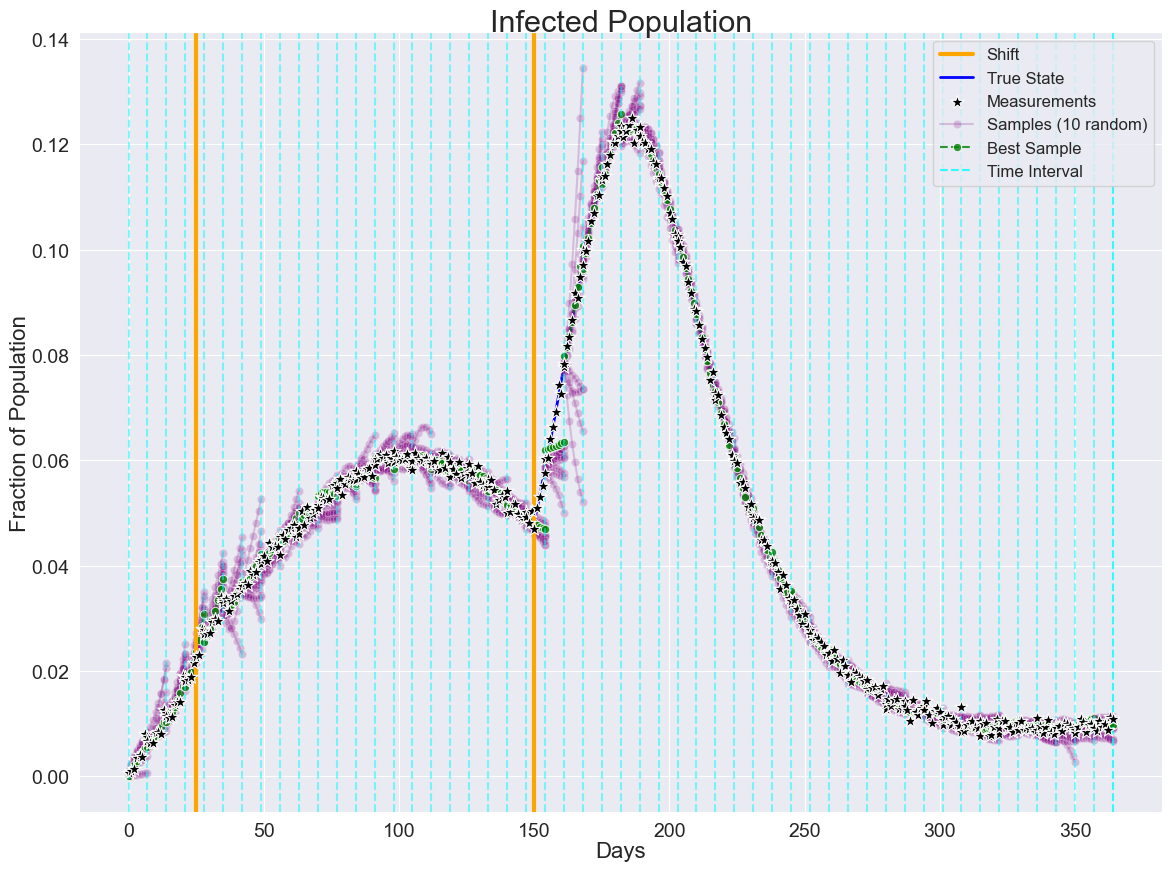

In [18]:
sr.plot_infected(figsize=(12,9))